In [3]:
import json
import re
import pandas as pd
from pprint import pprint
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

def save(data, name):
    filehandler = open(name,"wb")
    pickle.dump(data, filehandler)
    filehandler.close()
def load(name):
    filehandler = open(name, "rb")
    return pickle.load(filehandler)

folder_path = 'yelp_dataset_challenge_academic_dataset'
business_path = folder_path + '/yelp_academic_dataset_business.json'
review_path = folder_path + '/yelp_academic_dataset_review.json'

Filter out business_id only for Indian dishes

In [4]:
business_id = [] 
restaurant_name = dict()

with open (business_path, 'r', encoding='UTF8') as f:
    for line in f.readlines():
        business_json = json.loads(line)
        
        if 'Indian' in business_json['categories']:
            #print(business_json['categories'])
            data_id = business_json['business_id']
            business_id.append(data_id)
            restaurant_name[data_id] = business_json['name']
print(business_id[0])
print(restaurant_name[business_id[0]])

jqo3Ljexof9sA8PhSTwEjA
Maharaja Restaurant E Pt Plaza


Filter out reviews with stars using business_id

In [5]:
reviews = [] 
stars = []
rest_name = []

with open (review_path, 'r', encoding='UTF8') as f:
    for line in f.readlines():
        review_json = json.loads(line)
        
        if review_json['business_id'] in business_id:
            reviews.append(review_json['text'])
            stars.append(review_json['stars'])
            rest_name.append(restaurant_name[review_json['business_id']])

print(len(reviews), len(stars), len(rest_name))

8230 8230 8230


In [6]:
# load dish name list
provided_dish_names = []
with open('student_dn_annotations.txt', 'r') as rf:
    for line in rf:
        #split_list = line.strip().split()
        provided_dish_names.append(line.strip())
        
print(len(provided_dish_names))

2085


In [ ]:
# # select dish names
# # save reviews and stars for each dish
dataset = pd.DataFrame(columns=['review','star','dishes', 'restaurant'])
our_dishes = set()
our_restaurants = set()

for i, text in enumerate(reviews):
    temp_dish = []
    
    for j, dish in enumerate(provided_dish_names):
        dish_list = dish.rsplit()
        pattern = re.compile(r'%s' % "\s+".join(dish_list), re.IGNORECASE)  
        if len(pattern.findall(text)) != 0:
            temp_dish.append(provided_dish_names[j])
            our_dishes.add(provided_dish_names[j])
            
    dataset = dataset.append({'review': reviews[i], 
                              'star': stars[i], 
                              'dishes': temp_dish,
                              'restaurant': rest_name[i]}, 
                              ignore_index=True)
    our_restaurants.add(rest_name[i])
    #break
    
save(dataset, 'dataset_pd.pickle')
save(our_dishes, 'our_dishes.pickle')
save(our_restaurants, 'our_restaurants.pickle')

In [39]:
df = load('dataset_pd.pickle')
our_dishes = load('our_dishes.pickle')
our_restaurants = load('our_restaurants.pickle')

In [40]:
# drop empty dish names
df = df[df['dishes'].map(len) != 0]
# result: from 94183 rows to 75889 rows

Task 4: Mining Popular Dishes

In [139]:
dish_df = pd.DataFrame(columns=['total','1 star', '2 star', '3 star', '4 star', '5 star'])
cnt=0

for dish in our_dishes:

    filtered_df = df[df['dishes'].apply(lambda x: dish in x)]
    total = len(filtered_df)
    one = len(filtered_df[filtered_df['star']==1])
    two = len(filtered_df[filtered_df['star']==2])
    thr = len(filtered_df[filtered_df['star']==3]) 
    fou = len(filtered_df[filtered_df['star']==4])
    fiv = len(filtered_df[filtered_df['star']==5])

    dish_df.loc[dish] = [total, one, two, thr, fou, fiv]

In [175]:
plot_dish_df = dish_df.sort_values(by='total', ascending=False).iloc[:50]
print('total max:', plot_dish_df['total'].max(), ', total min:',plot_dish_df['total'].min())
del plot_dish_df['total']

total max: 2905 , total min: 103


In [176]:
 plot_dish_df

,1 star,2 star,3 star,4 star,5 star
chicken,143,241,466,1048,1007
rice,148,257,479,1056,879
buffet,140,205,433,984,965
naan,105,211,409,978,844
garlic,35,72,153,465,437
lamb,48,78,160,425,360
tikka masala,53,81,155,326,316
chicken tikka,52,74,157,311,320
meat,34,67,121,281,243
chicken tikka masala,43,58,126,243,240


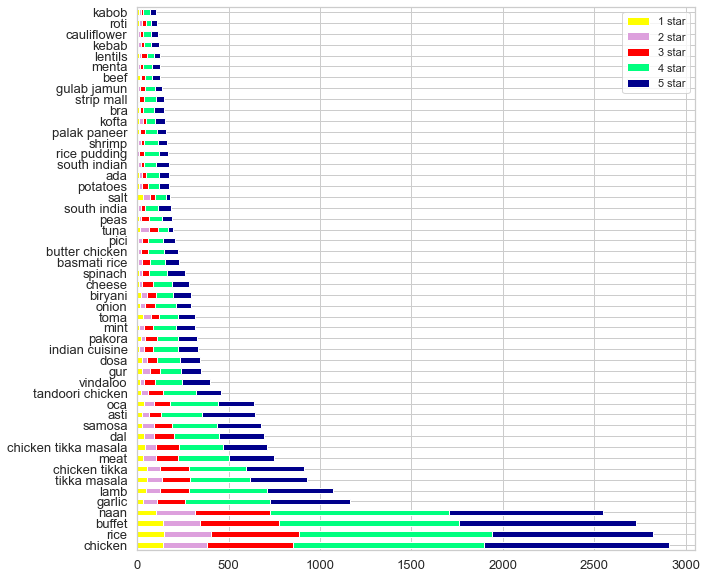

In [177]:

ax=plot_dish_df.plot.barh(stacked=True, 
                       figsize=(10,10), 
                       color=['yellow', 'plum', 'red', 'springgreen', 'darkblue'],
                       fontsize=13
                       )

In [147]:
plot_dish_df['total'] = plot_dish_df['1 star'] + plot_dish_df['2 star'] + plot_dish_df['3 star'] + plot_dish_df['4 star'] + plot_dish_df['5 star']

In [148]:
plot_scaled_df = pd.DataFrame(columns=['1 star', '2 star', '3 star', '4 star', '5 star'])
plot_scaled_df['1 star'] = plot_dish_df['1 star'] / plot_dish_df['total']
plot_scaled_df['2 star'] = plot_dish_df['2 star'] / plot_dish_df['total']
plot_scaled_df['3 star'] = plot_dish_df['3 star'] / plot_dish_df['total']
plot_scaled_df['4 star'] = plot_dish_df['4 star'] / plot_dish_df['total']
plot_scaled_df['5 star'] = plot_dish_df['5 star'] / plot_dish_df['total']

<AxesSubplot:>

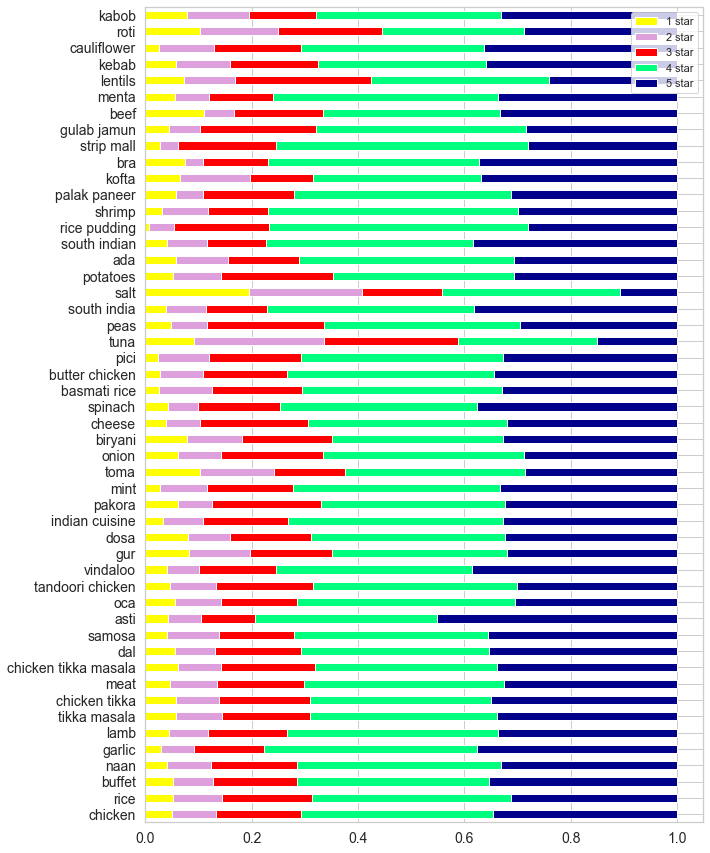

In [159]:
plot_scaled_df.plot.barh(stacked=True, 
                       figsize=(10,15), 
                       color=['yellow', 'plum', 'red', 'springgreen', 'darkblue'],
                       fontsize=14
                       )
        


Task 5: Restaurant Recommendation


In [183]:
pop_dish_df = df[df['dishes'].apply(lambda x: 'south indian' in x)]

In [184]:
restaurant_df = pd.DataFrame(columns=['total','1 star', '2 star', '3 star', '4 star', '5 star'])
cnt=0

for restaurant in our_restaurants:

    filtered_df = pop_dish_df[pop_dish_df['restaurant'].apply(lambda x: restaurant in x)]
    total = len(filtered_df)
    one = len(filtered_df[filtered_df['star']==1])
    two = len(filtered_df[filtered_df['star']==2])
    thr = len(filtered_df[filtered_df['star']==3]) 
    fou = len(filtered_df[filtered_df['star']==4])
    fiv = len(filtered_df[filtered_df['star']==5])

    restaurant_df.loc[restaurant] = [total, one, two, thr, fou, fiv]

In [185]:
plot_rest_df = restaurant_df.sort_values(by='total', ascending=False).iloc[:30]
print('total max:',plot_rest_df['total'].max(), ', total min:',plot_rest_df['total'].min())
del plot_rest_df['total']

total max: 19 , total min: 2


<AxesSubplot:>

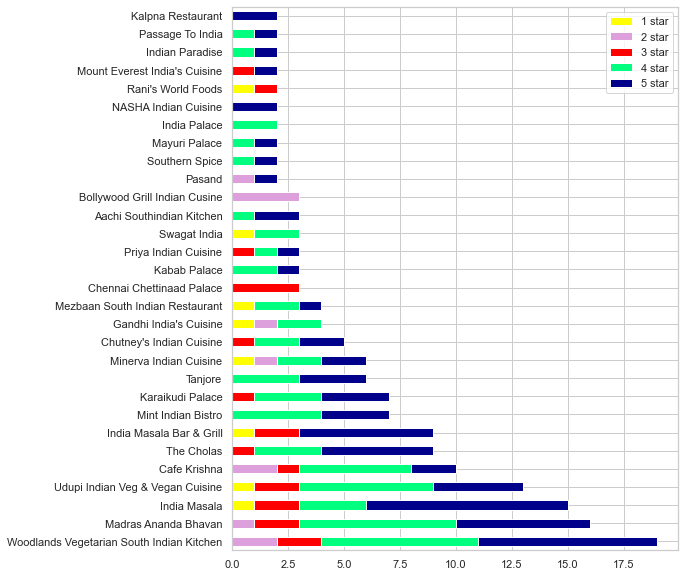

In [186]:
plot_rest_df.plot.barh(stacked=True, 
                       figsize=(8,10), 
                       color=['yellow', 'plum', 'red', 'springgreen', 'darkblue'])

In [187]:
plot_rest_df['total'] = plot_rest_df['1 star'] + plot_rest_df['2 star'] + plot_rest_df['3 star'] + plot_rest_df['4 star'] + plot_rest_df['5 star']

In [188]:
plot_scaled2_df = pd.DataFrame(columns=['1 star', '2 star', '3 star', '4 star', '5 star'])
plot_scaled2_df['1 star'] = plot_rest_df['1 star'] / plot_rest_df['total']
plot_scaled2_df['2 star'] = plot_rest_df['2 star'] / plot_rest_df['total']
plot_scaled2_df['3 star'] = plot_rest_df['3 star'] / plot_rest_df['total']
plot_scaled2_df['4 star'] = plot_rest_df['4 star'] / plot_rest_df['total']
plot_scaled2_df['5 star'] = plot_rest_df['5 star'] / plot_rest_df['total']

<AxesSubplot:>

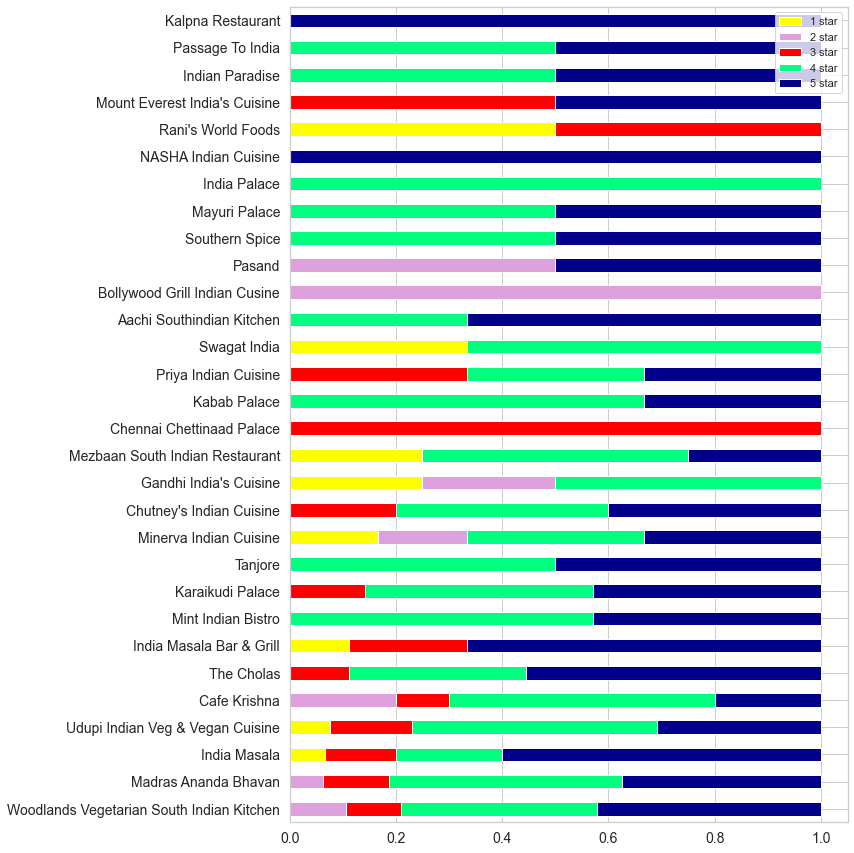

In [194]:
plot_scaled2_df.plot.barh(stacked=True, 
                       figsize=(10,15), 
                       color=['yellow', 'plum', 'red', 'springgreen', 'darkblue'],
                       fontsize=14
                       )
        
